# Import the necessary Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Police dataset

In [67]:
# Data source: https://www.kaggle.com/datasets/vivekverma97/police-csv-file-pandas-basic/data
police_data = 'https://docs.google.com/spreadsheets/d/18KRQw4GBmIzf5mbshtH4pa4nTGZVKNIWtKlvVTOPKuA/export'
df = pd.read_excel(police_data)

# Display the top 5 rows of the dataset to see what it looks like
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,0.0,0-15 Min,False
1,2005-01-18,08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,0.0,0-15 Min,False
2,2005-01-23,23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,0.0,0-15 Min,False
3,2005-02-20,17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,1.0,16-30 Min,False
4,2005-03-14,10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,0.0,0-15 Min,False


# Data Cleaning

In [68]:
# Check missing values in the dataset
df.isnull().sum()

,0
stop_date,0
stop_time,0
county_name,91741
driver_gender,5335
driver_age_raw,5327
driver_age,5621
driver_race,5333
violation_raw,5333
violation,5333
search_conducted,0


In [69]:
# Remove the column(s) that is/are null all through (not useful for the analysis)
df.drop(columns=['county_name'], inplace=True)

# Drop any row with missing values
df.dropna(inplace=True)

# Recheck to see if any missing values still exists in the dataset
df.isnull().sum()

,0
stop_date,0
stop_time,0
driver_gender,0
driver_age_raw,0
driver_age,0
driver_race,0
violation_raw,0
violation,0
search_conducted,0
search_type,0


# Exploratory Data Analysis (EDA)

In [70]:
# Basic statistics
df.describe()

,stop_date,driver_age_raw,driver_age,is_arrested
count,3193,3193.000000,3193.000000,3193.000000
mean,2010-04-26 22:43:46.996555008,1979.181647,30.660194,0.342311
min,2005-08-28 00:00:00,1930.000000,15.000000,0.000000
25%,2007-08-20 00:00:00,1973.000000,23.000000,0.000000
50%,2010-01-23 00:00:00,1982.000000,28.000000,0.000000
75%,2012-08-17 00:00:00,1987.000000,36.000000,1.000000
max,2015-12-30 00:00:00,1997.000000,79.000000,1.000000
std,NaN,10.651059,10.336147,0.474557


In [71]:
# Convert driver_age type to integer
df['driver_age'] = df['driver_age'].astype(int)

<ipython-input-72-a16e2a0b298c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='driver_age', data=df, palette='viridis')


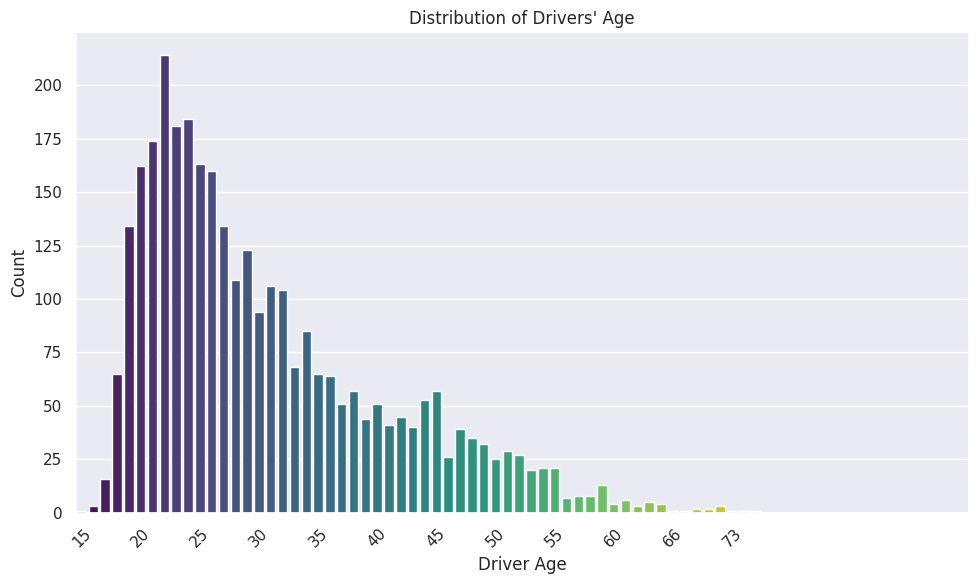

In [72]:
# Visualize the distribution of drivers' age
plt.figure(figsize=(10,6))
sns.countplot(x='driver_age', data=df, palette='viridis')
plt.title("Distribution of Drivers' Age")
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# set the ticks to range. Motivation: to have a neat visualization
plt.xticks(np.arange(0, 80, 5)) # Resource: https://www.geeksforgeeks.org/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib/
plt.show()

# Arrest Ananlysis

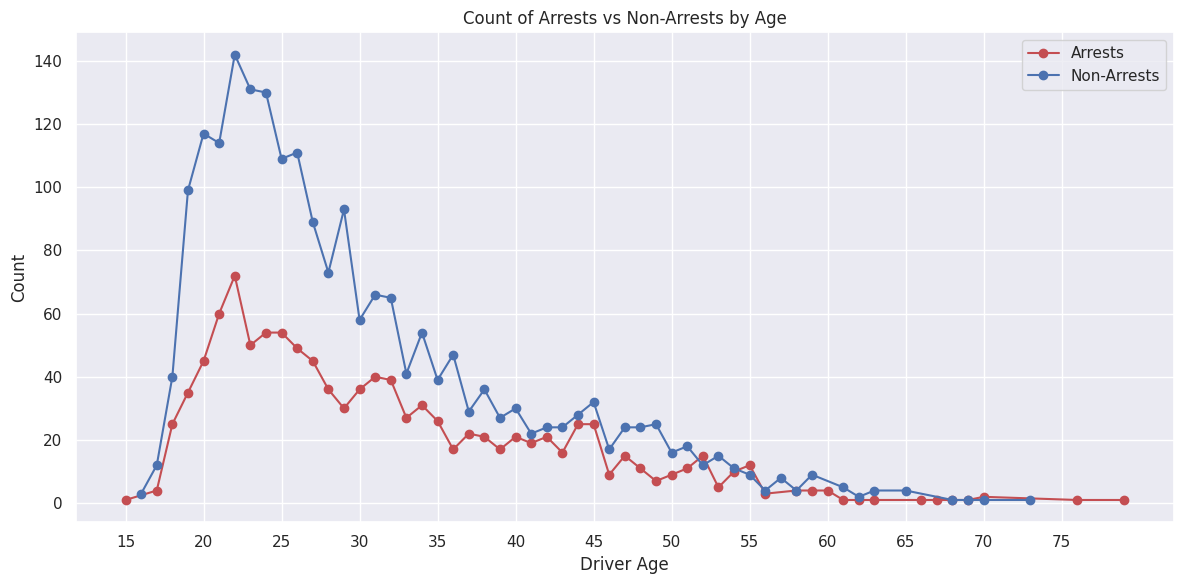

In [74]:
# Visualize the count of arrests vs non-arrests by age

# To calculate the number of arrests and non-arrests by age
arrests_by_age = df[df['is_arrested'] == 1]['driver_age'].value_counts().sort_index()
non_arrests_by_age = df[df['is_arrested'] == 0]['driver_age'].value_counts().sort_index()

# Plot the counts of arrests and non-arrests by age using a line graph
plt.figure(figsize=(12,6))
plt.plot(arrests_by_age.index, arrests_by_age.values, marker='o', label='Arrests', color='r')
plt.plot(non_arrests_by_age.index, non_arrests_by_age.values, marker='o', label='Non-Arrests', color='b')
plt.title('Count of Arrests vs Non-Arrests by Age')
plt.xlabel('Driver Age')
plt.ylabel('Count')
plt.legend()
plt.xticks(np.arange(15, 80, 5))
plt.tight_layout()
plt.show()